# 官员晋升时间预测

## 数据导入

In [65]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,RobustScaler
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn import linear_model

In [66]:
df = pd.read_csv('dataset_new.csv')
df

,Unnamed: 0,name,gender,race,born_locate,born_year,education,working_year,if_ccp,join_year,current_post,next_post,current_post_year,next_post_year
0,1,陈雍,1,满族,辽宁,1966.0,2,1991.0,1,1988.0,11,12,1996,2011
1,2,王宁,1,汉族,山西,1960.0,2,1983.0,1,1987.0,11,12,1989,1994
2,3,崔述强,1,汉族,北京,1963.0,3,1985.0,1,1988.0,5,9,1987,1989
3,4,崔述强,1,汉族,北京,1963.0,3,1985.0,1,1988.0,9,10,1989,2009
4,5,崔述强,1,汉族,北京,1963.0,3,1985.0,1,1988.0,10,11,2009,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1490,吴仰东,1,汉族,甘肃,1963.0,1,1983.0,1,1987.0,7,9,1992,2001
1490,1491,王立奇,1,汉族,辽宁,1977.0,2,2003.0,1,1995.0,6,7,2003,2005
1491,1492,王立奇,1,汉族,辽宁,1977.0,2,2003.0,1,1995.0,7,9,2005,2015
1492,1493,孙伟,1,汉族,山东,1961.0,1,1977.0,1,1988.0,5,7,1992,1999


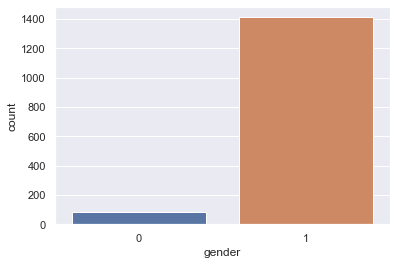

In [67]:
# 不同性别的升职情况
%matplotlib inline 
sns.countplot(df['gender'])

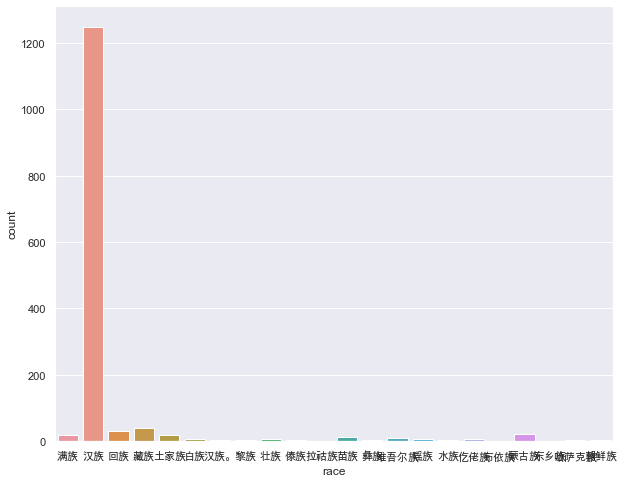

In [68]:
# 不同民族的升职情况
%matplotlib inline
plt.figure(figsize = [10,8])
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 解决Matplotlib中文乱码
plt.rcParams['axes.unicode_minus'] = False  # 解决Matplotlib图像是负号'-'显示为方块的问题
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题
sns.countplot(df['race'])
plt.show()

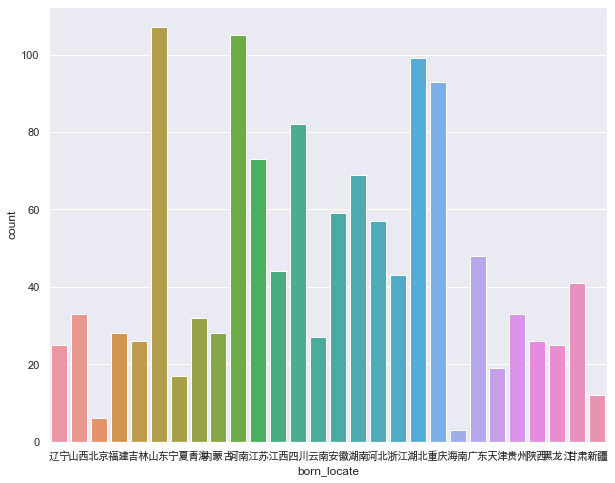

In [69]:
# 不同省份的升职情况
%matplotlib inline
plt.figure(figsize = [10,8])
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 解决Matplotlib中文乱码
plt.rcParams['axes.unicode_minus'] = False  # 解决Matplotlib图像是负号'-'显示为方块的问题
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题
sns.countplot(df['born_locate'])
plt.show()

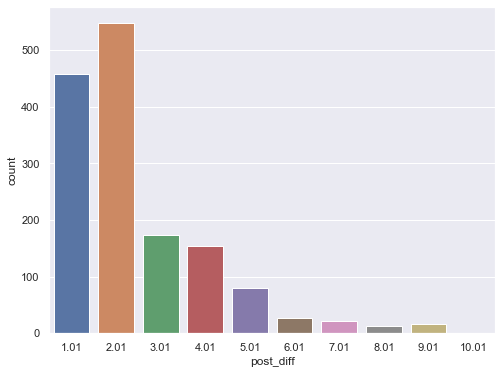

In [70]:
%matplotlib inline
# 升职跨度
df.eval('post_diff = next_post - current_post + 0.01' , inplace=True)
plt.figure(figsize = [8,6])
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 解决Matplotlib中文乱码
plt.rcParams['axes.unicode_minus'] = False  # 解决Matplotlib图像是负号'-'显示为方块的问题
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题
sns.countplot(df['post_diff'])
plt.show()

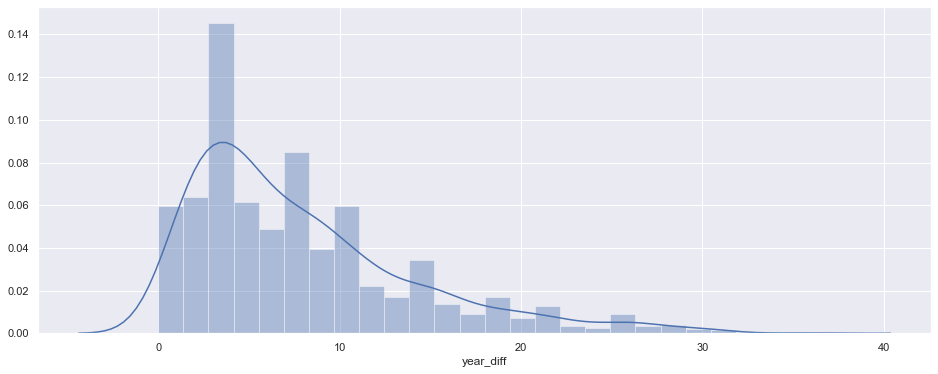

In [71]:
# 升职年份分布查看
df.eval('year_diff = next_post_year - current_post_year + 0.0001' , inplace=True)
plt.figure(figsize = [16,6])
sns.distplot(df['year_diff'])

In [137]:
df['year_diff'].mean()

8.166201694915255

## 相关性分析

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


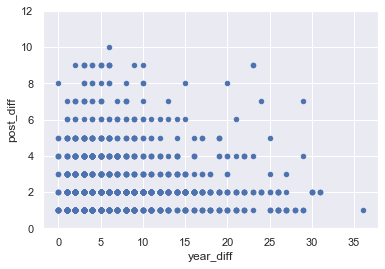

In [72]:
# 查看级别跨度与升职年限之间的关系
data = pd.concat([df['year_diff'], df['post_diff']], axis=1)
data.plot.scatter(x='year_diff', y='post_diff', ylim=(0,12));

In [73]:
#获得年龄、官龄、党龄的关系
df.eval('age = current_post_year - born_year +0.0001', inplace = True)
df.eval('work_years = current_post_year - working_year +0.0001 ', inplace = True)
df.eval('ccp_years = current_post_year - join_year +0.0001',inplace = True) 
df

,Unnamed: 0,name,gender,race,born_locate,born_year,education,working_year,if_ccp,join_year,current_post,next_post,current_post_year,next_post_year,post_diff,year_diff,age,work_years,ccp_years
0,1,陈雍,1,满族,辽宁,1966.0,2,1991.0,1,1988.0,11,12,1996,2011,1.01,15.0001,30.0001,5.0001,8.0001
1,2,王宁,1,汉族,山西,1960.0,2,1983.0,1,1987.0,11,12,1989,1994,1.01,5.0001,29.0001,6.0001,2.0001
2,3,崔述强,1,汉族,北京,1963.0,3,1985.0,1,1988.0,5,9,1987,1989,4.01,2.0001,24.0001,2.0001,-0.9999
3,4,崔述强,1,汉族,北京,1963.0,3,1985.0,1,1988.0,9,10,1989,2009,1.01,20.0001,26.0001,4.0001,1.0001
4,5,崔述强,1,汉族,北京,1963.0,3,1985.0,1,1988.0,10,11,2009,2017,1.01,8.0001,46.0001,24.0001,21.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1490,吴仰东,1,汉族,甘肃,1963.0,1,1983.0,1,1987.0,7,9,1992,2001,2.01,9.0001,29.0001,9.0001,5.0001
1490,1491,王立奇,1,汉族,辽宁,1977.0,2,2003.0,1,1995.0,6,7,2003,2005,1.01,2.0001,26.0001,0.0001,8.0001
1491,1492,王立奇,1,汉族,辽宁,1977.0,2,2003.0,1,1995.0,7,9,2005,2015,2.01,10.0001,28.0001,2.0001,10.0001
1492,1493,孙伟,1,汉族,山东,1961.0,1,1977.0,1,1988.0,5,7,1992,1999,2.01,7.0001,31.0001,15.0001,4.0001


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


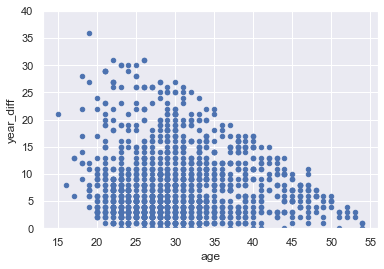

In [74]:
%matplotlib inline
# 查看年龄和晋升的关系
data = pd.concat([df['age'], df['year_diff']], axis=1)
data.plot.scatter(x='age', y='year_diff', ylim=(0,40));

In [75]:
import warnings
 
warnings.filterwarnings("ignore")


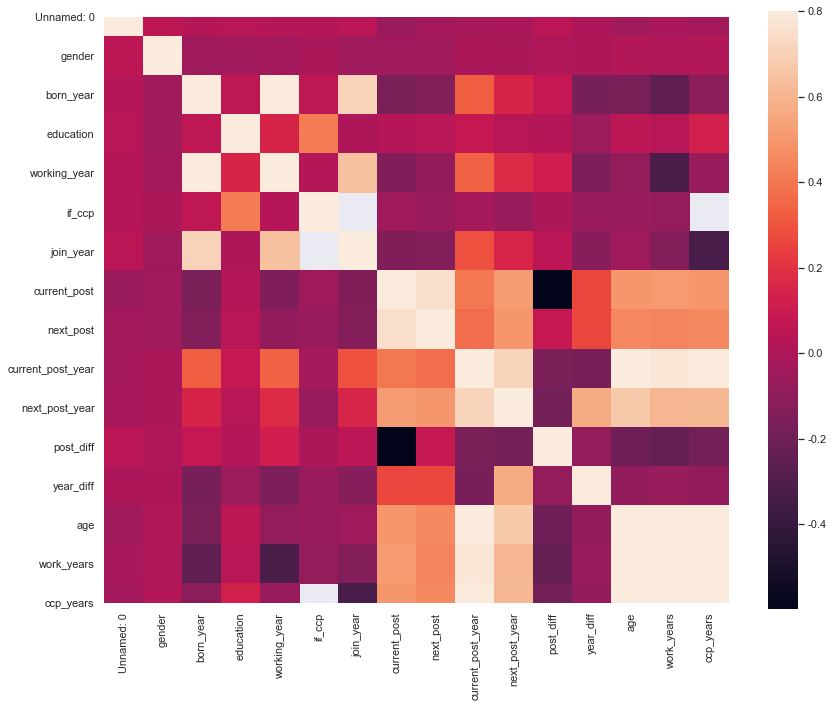

In [76]:
corrmat = df.corr()
plt.subplots(figsize=(14, 11))
sns.heatmap(corrmat, vmax=.8, square=True);

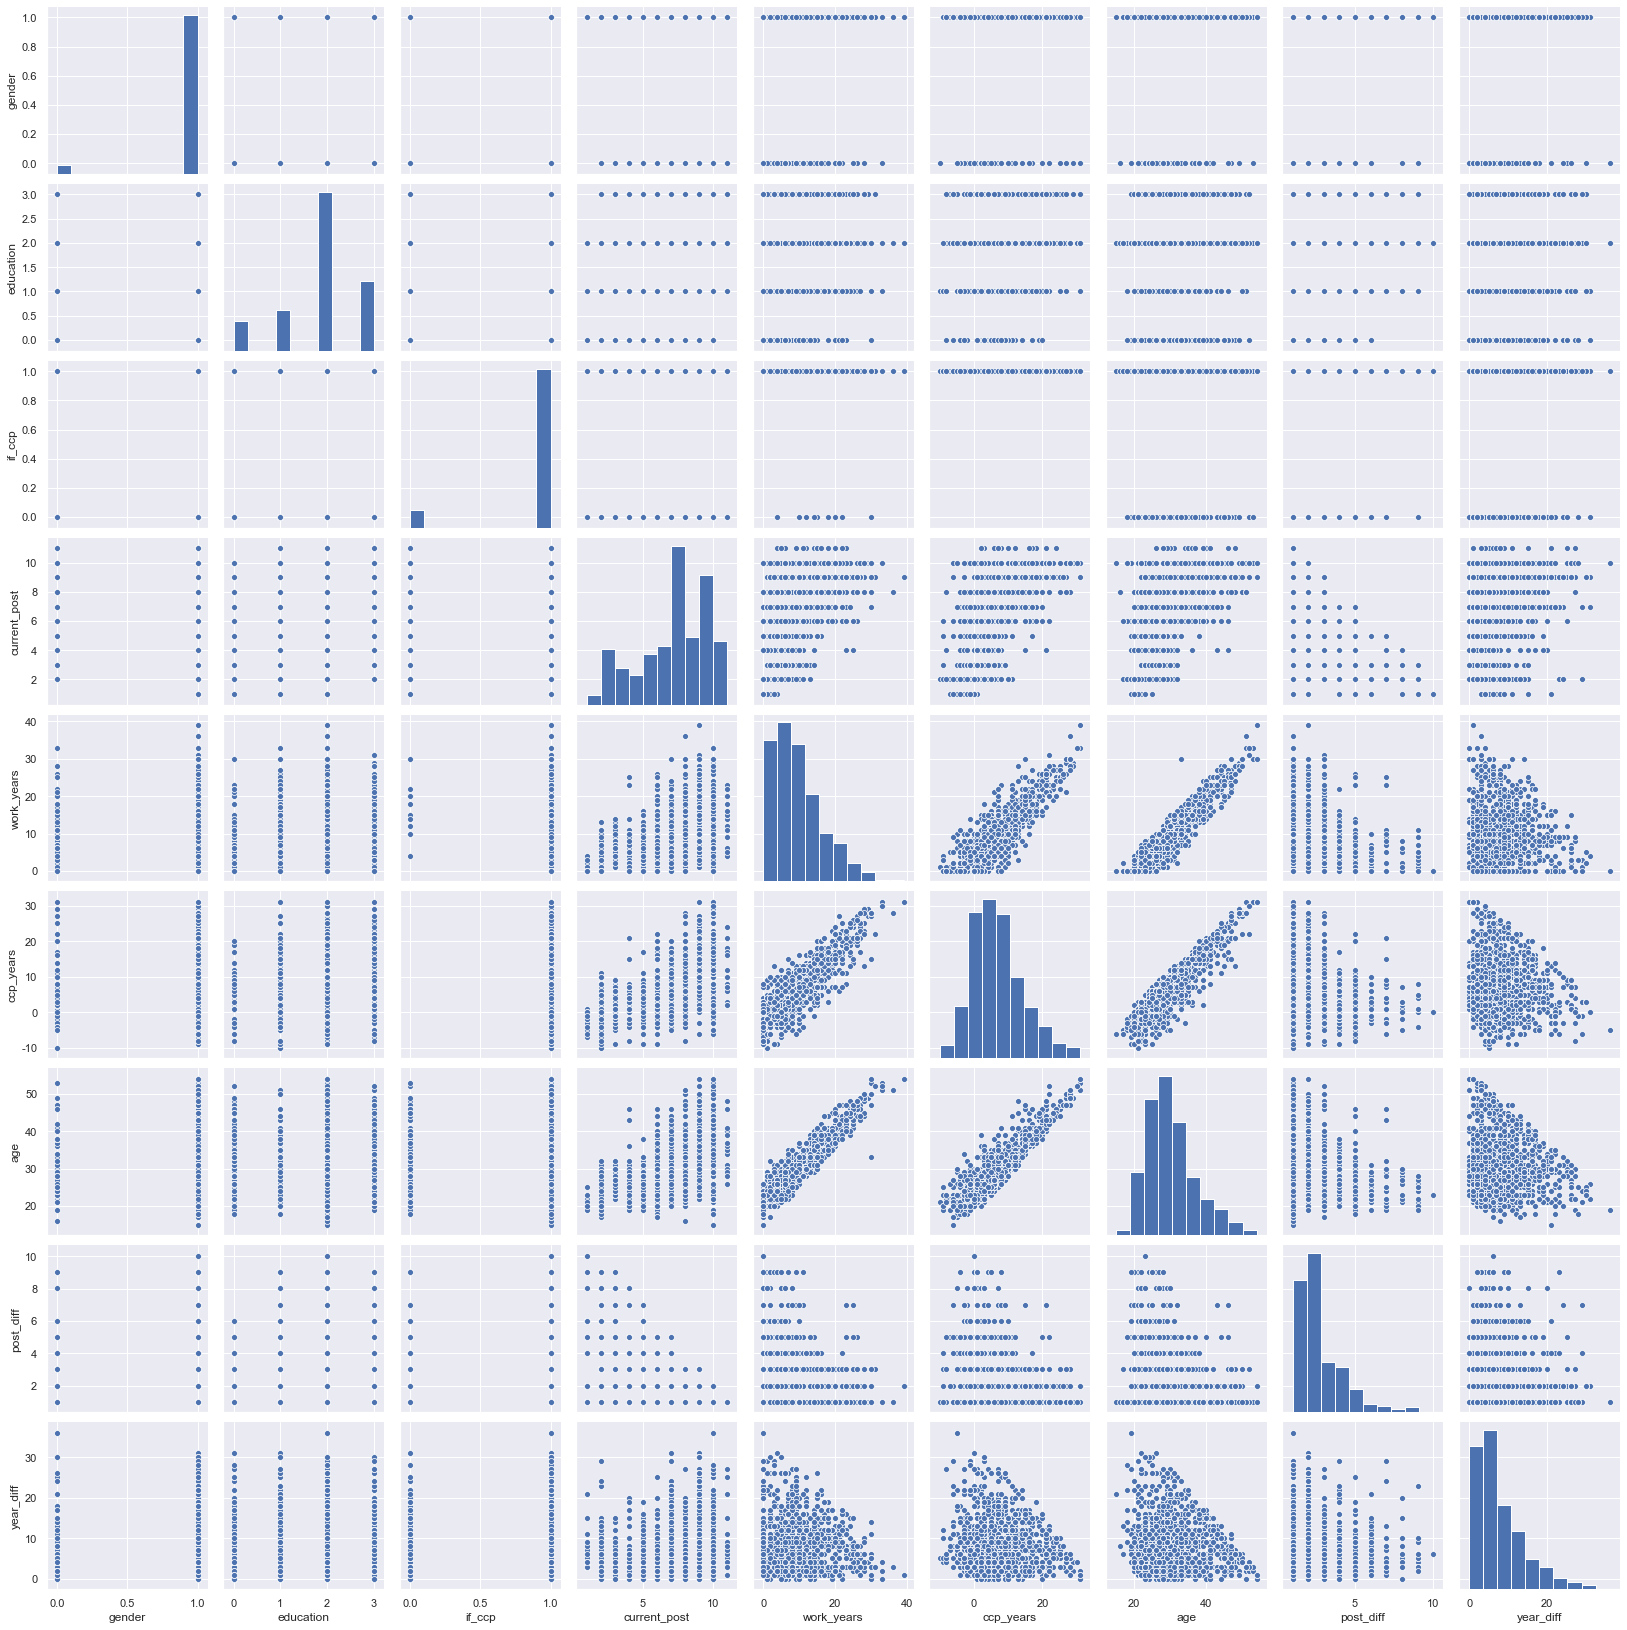

In [77]:
cols = ['gender','race','born_locate', 'education', 'if_ccp', 'current_post', 'work_years', 'ccp_years', 'age','post_diff', 'year_diff']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [78]:
df_processed = DataFrame()
df_processed = pd.concat([df_processed, pd.get_dummies(df['race'])], axis = 1).copy()
df_processed = pd.concat([df_processed, pd.get_dummies(df['born_locate'])], axis = 1).copy()
df_processed = pd.concat([df_processed, df['education']], axis = 1).copy()
df_processed = pd.concat([df_processed, df['age']], axis = 1).copy()
df_processed = pd.concat([df_processed, df['if_ccp']], axis = 1).copy()
df_processed = pd.concat([df_processed, df['work_years']], axis = 1).copy()
df_processed = pd.concat([df_processed, df['ccp_years']], axis = 1).copy()
df_processed = pd.concat([df_processed, df['current_post']], axis = 1).copy()
df_processed = pd.concat([df_processed, df['post_diff']], axis = 1).copy()
df_processed = pd.concat([df_processed, df['year_diff']], axis = 1).copy()
df_processed

,东乡族,仡佬族,傣族,哈萨克族,回族,土家族,壮族,布依族,彝族,拉祜族,...,青海,黑龙江,education,age,if_ccp,work_years,ccp_years,current_post,post_diff,year_diff
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,30.0001,1,5.0001,8.0001,11,1.01,15.0001
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,29.0001,1,6.0001,2.0001,11,1.01,5.0001
2,0,0,0,0,0,0,0,0,0,0,...,0,0,3,24.0001,1,2.0001,-0.9999,5,4.01,2.0001
3,0,0,0,0,0,0,0,0,0,0,...,0,0,3,26.0001,1,4.0001,1.0001,9,1.01,20.0001
4,0,0,0,0,0,0,0,0,0,0,...,0,0,3,46.0001,1,24.0001,21.0001,10,1.01,8.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,0,0,0,0,0,0,0,0,0,0,...,0,0,1,29.0001,1,9.0001,5.0001,7,2.01,9.0001
1490,0,0,0,0,0,0,0,0,0,0,...,0,0,2,26.0001,1,0.0001,8.0001,6,1.01,2.0001
1491,0,0,0,0,0,0,0,0,0,0,...,0,0,2,28.0001,1,2.0001,10.0001,7,2.01,10.0001
1492,0,0,0,0,0,0,0,0,0,0,...,0,0,1,31.0001,1,15.0001,4.0001,5,2.01,7.0001


## 删除缺失值

In [79]:
# 删除缺失值
total = df_processed.isnull().sum().sort_values(ascending = False)
percent = (df_processed.isnull().sum()/df_processed.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
ccp_years,237,0.158635
work_years,177,0.118474
age,14,0.009371
year_diff,0,0.000000
汉族。,0,0.000000
北京,0,0.000000
内蒙古,0,0.000000
云南,0,0.000000
黎族,0,0.000000
藏族,0,0.000000


In [80]:
# 清除所有有空缺的行
df_processed = df_processed.dropna()
total = df_processed.isnull().sum()
total

东乡族             0
仡佬族             0
傣族              0
哈萨克族            0
回族              0
土家族             0
壮族              0
布依族             0
彝族              0
拉祜族             0
朝鲜族             0
水族              0
汉族              0
汉族。             0
满族              0
瑶族              0
白族              0
维吾尔族            0
苗族              0
蒙古族             0
藏族              0
黎族              0
云南              0
内蒙古             0
北京              0
吉林              0
四川              0
天津              0
宁夏              0
安徽              0
山东              0
山西              0
广东              0
新疆              0
江苏              0
江西              0
河北              0
河南              0
浙江              0
海南              0
湖北              0
湖南              0
甘肃              0
福建              0
贵州              0
辽宁              0
重庆              0
陕西              0
青海              0
黑龙江             0
education       0
age             0
if_ccp          0
work_years      0
ccp_years       0
current_po

In [98]:
# 删除post_diff不合格的数据 再删除post_diff
temp = df_processed.drop(df_processed[df_processed.post_diff>4].index).copy()
temp =temp.drop('post_diff', axis = 1)
temp

,东乡族,仡佬族,傣族,哈萨克族,回族,土家族,壮族,布依族,彝族,拉祜族,...,陕西,青海,黑龙江,education,age,if_ccp,work_years,ccp_years,current_post,year_diff
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3.401201,1,1.609458,8.0001,2.397895,2.708057
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3.367299,1,1.791776,2.0001,2.397895,1.609458
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,3.258100,1,1.386319,1.0001,2.197225,2.995737
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,3.828644,1,3.178058,21.0001,2.302585,2.079454
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3.178058,1,0.693197,3.0001,2.197225,2.772595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3.871203,1,3.258100,21.0001,2.197225,1.791776
1489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3.367299,1,2.197236,5.0001,1.945910,2.197236
1490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3.258100,1,-9.210340,8.0001,1.791759,0.693197
1491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3.332208,1,0.693197,10.0001,1.945910,2.302595


In [112]:
df_processed = temp.copy()
df_processed

,东乡族,仡佬族,傣族,哈萨克族,回族,土家族,壮族,布依族,彝族,拉祜族,...,陕西,青海,黑龙江,education,age,if_ccp,work_years,ccp_years,current_post,year_diff
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3.401201,1,1.609458,8.0001,2.397895,2.708057
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3.367299,1,1.791776,2.0001,2.397895,1.609458
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,3.258100,1,1.386319,1.0001,2.197225,2.995737
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,3.828644,1,3.178058,21.0001,2.302585,2.079454
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3.178058,1,0.693197,3.0001,2.197225,2.772595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3.871203,1,3.258100,21.0001,2.197225,1.791776
1489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3.367299,1,2.197236,5.0001,1.945910,2.197236
1490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3.258100,1,-9.210340,8.0001,1.791759,0.693197
1491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3.332208,1,0.693197,10.0001,1.945910,2.302595


## 训练集测试集生成

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

In [114]:
# 展平数据和flatten区别
# 获得训练集的X和y
y=df_processed.iloc[:,-1].ravel()
X=df_processed.iloc[:,:-1].values

scaler = RobustScaler()
X_scale = scaler.fit(X).transform(X)


x_train, x_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)
x_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.96565238,
         1.4       ,  0.61981764],
       [ 0.        ,  0.        ,  0.        , ..., -1.99994337,
        -0.7       , -3.08969365],
       [ 0.        ,  0.        ,  0.        , ...,  0.92995185,
         1.3       ,  0.61981764],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.99999191,
        -0.4       , -3.08969365],
       [ 0.        ,  0.        ,  0.        , ..., -0.73813681,
        -0.7       , -0.38018236],
       [ 0.        ,  0.        ,  0.        , ..., -0.53502488,
         0.2       ,  0.        ]])

## 模型评估

In [115]:
# 交叉验证
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [116]:
#网格搜索调参
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']]) # 取列操作
        

## 模型训练

In [117]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge

from sklearn import metrics

In [143]:
models = [Ridge(),Lasso(),RandomForestRegressor(),GradientBoostingRegressor(),
          SVR(),ElasticNet(),SGDRegressor(),BayesianRidge(),
          KernelRidge(),ExtraTreesRegressor(),XGBRegressor()]
names = ["Ridge", "Lasso", "RF", "GBR", "SVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, x_train, y_train)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

Ridge: 1.565562, 0.2211
Lasso: 1.572421, 0.2363
RF: 1.640958, 0.2192
GBR: 1.622756, 0.1609
SVR: 1.556005, 0.2283
Ela: 1.572421, 0.2363
SGD: 1.543447, 0.2215
Bay: 1.543353, 0.2273
Ker: 1.685131, 0.1758
Extra: 1.696473, 0.2176
Xgb: 1.685365, 0.2030


### Ridge

In [119]:
model_ridge = Ridge()
RidgeParams = {'alpha':[35,40,45,50,55,60,65,70,80,90]}
grid(model_ridge).grid_get(x_train, y_train, RidgeParams)

{'alpha': 35} 1.5558635430822236
          params  mean_test_score  std_test_score
0  {'alpha': 35}         1.555864        0.701501
1  {'alpha': 40}         1.555963        0.702259
2  {'alpha': 45}         1.556120        0.702959
3  {'alpha': 50}         1.556311        0.703610
4  {'alpha': 55}         1.556521        0.704218
5  {'alpha': 60}         1.556742        0.704788
6  {'alpha': 65}         1.556969        0.705324
7  {'alpha': 70}         1.557197        0.705831
8  {'alpha': 80}         1.557651        0.706768
9  {'alpha': 90}         1.558092        0.707617


In [123]:
# 测试集结果
other_params = {'alpha': 35}
model_bay = Ridge(**other_params)
model_bay.fit(x_train, y_train)
y_test_pred = model_bay.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

1.5684182955591228

### Lasso

In [121]:
other_params = {'alpha':[0.01, 0.005, 0.001, 0.0009, 0.0008, 0.0007, 0.0006, 0.0005, 0.0002, 0.0001], 
                  'max_iter':[10000]}
model_lasso = Lasso()
grid(model_lasso).grid_get(x_train, y_train, other_params)

{'alpha': 0.01, 'max_iter': 10000} 1.5545921903579247
                                 params  mean_test_score  std_test_score
0    {'alpha': 0.01, 'max_iter': 10000}         1.554592        0.699561
1   {'alpha': 0.005, 'max_iter': 10000}         1.560746        0.701285
2   {'alpha': 0.001, 'max_iter': 10000}         1.580885        0.711398
3  {'alpha': 0.0009, 'max_iter': 10000}         1.581746        0.711241
4  {'alpha': 0.0008, 'max_iter': 10000}         1.582735        0.710971
5  {'alpha': 0.0007, 'max_iter': 10000}         1.583752        0.710513
6  {'alpha': 0.0006, 'max_iter': 10000}         1.584814        0.709957
7  {'alpha': 0.0005, 'max_iter': 10000}         1.585921        0.709300
8  {'alpha': 0.0002, 'max_iter': 10000}         1.589683        0.706115
9  {'alpha': 0.0001, 'max_iter': 10000}         1.591190        0.704513


In [122]:
# 测试集结果
other_params = {'alpha': 0.01, 'max_iter': 10000}
model_lasso = Lasso(**other_params)
model_lasso.fit(x_train, y_train)
y_test_pred = model_lasso.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

1.5779400651809659

### RandomForest

In [126]:
from sklearn.ensemble import RandomForestRegressor

cv_params = {'n_estimators':[760, 780, 800,820,840]}
other_params = {'max_depth' : 5, 'min_samples_split' : 2, 'min_samples_leaf' : 1, 'min_weight_fraction_leaf':0.0,
                'max_features' : 'auto', 'min_impurity_decrease':0.0}

model_rf = RandomForestRegressor(**other_params)
grid(model_rf).grid_get(x_train, y_train, cv_params)


{'n_estimators': 780} 1.5620555871532962
                  params  mean_test_score  std_test_score
0  {'n_estimators': 760}         1.565294        0.651464
1  {'n_estimators': 780}         1.562056        0.647845
2  {'n_estimators': 800}         1.565081        0.647510
3  {'n_estimators': 820}         1.564254        0.659895
4  {'n_estimators': 840}         1.563583        0.647930


In [127]:
cv_params = {'max_depth':[6,7,8,9,10,11,12,13],'min_samples_split' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
other_params = {'n_estimators':780, 'min_samples_leaf' : 1, 'min_weight_fraction_leaf':0.0,
                'max_features' : 'auto', 'min_impurity_decrease':0.0}
model_rf = RandomForestRegressor(**other_params)
grid(model_rf).grid_get(x_train, y_train, cv_params)

{'max_depth': 13, 'min_samples_split': 9} 1.5457763764672339
                                         params  mean_test_score  \
0      {'max_depth': 6, 'min_samples_split': 2}         1.569878   
1      {'max_depth': 6, 'min_samples_split': 3}         1.565426   
2      {'max_depth': 6, 'min_samples_split': 4}         1.563114   
3      {'max_depth': 6, 'min_samples_split': 5}         1.561458   
4      {'max_depth': 6, 'min_samples_split': 6}         1.553508   
..                                          ...              ...   
107  {'max_depth': 13, 'min_samples_split': 11}         1.547790   
108  {'max_depth': 13, 'min_samples_split': 12}         1.547781   
109  {'max_depth': 13, 'min_samples_split': 13}         1.547750   
110  {'max_depth': 13, 'min_samples_split': 14}         1.548641   
111  {'max_depth': 13, 'min_samples_split': 15}         1.548903   

     std_test_score  
0          0.639364  
1          0.626074  
2          0.614246  
3          0.624829  
4          0

In [128]:
params = {'max_depth': 13,'n_estimators':492, 'min_samples_split': 9,'min_weight_fraction_leaf':0.0,
          'min_samples_leaf' : 13, 'max_features' : 'auto','min_impurity_decrease': 0.0,
          'min_weight_fraction_leaf': 0.0}
model_rf = RandomForestRegressor(**params)
model_rf.fit(x_train, y_train)
# print(model.feature_importances_)
# print(list(train_df.columns))
score_list = []
columnsList = list(df_processed.iloc[:,:-1].columns).copy()
#print(columnsList)
for i in range(len(columnsList)-1):
    score_list.append((columnsList[i], model_rf.feature_importances_[i]))
    
def takeSecond(elem):
    return elem[1]
print('特征重要性排名：')
res = sorted(score_list, key = takeSecond, reverse = True)
# 取重要性前十名
res = res[:20]

print(res)

特征重要性排名：
[('age', 0.19206215618709907), ('ccp_years', 0.18953355399071997), ('work_years', 0.1582697860680281), ('重庆', 0.09020000407307611), ('贵州', 0.04678518214182561), ('education', 0.04410635523451505), ('河南', 0.009659186867483002), ('青海', 0.009499303134114357), ('安徽', 0.0073351760131837385), ('山东', 0.005571625667104674), ('汉族', 0.0032959159915502585), ('广东', 0.0004593235245930667), ('湖北', 0.0003366622421803404), ('湖南', 0.0002916128240274365), ('四川', 0.00016143952168855887), ('河北', 2.0192921501271454e-05), ('东乡族', 0.0), ('仡佬族', 0.0), ('傣族', 0.0), ('哈萨克族', 0.0)]


In [221]:
# 测试集结果
y_test_pred = model_rf.predict( x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

1.518761514711032

### Bayesian

In [130]:
cv_params = {'alpha_1':[1e-5,1e-6,1e-7],'lambda_1':[1e-5,1e-6,1e-7]}
other_params = {'alpha_2':1e-6,'lambda_2':1e-6}
model_bay = BayesianRidge(**other_params)
grid(model).grid_get(x_train,y_train ,cv_params)

[23:24:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { alpha_1, lambda_1 } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:24:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { alpha_1, lambda_1 } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:24:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { alpha_1, lambda_1 } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[23:24:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { alpha_1, lambda_1 } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:24:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { alpha_1, lambda_1 } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:24:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { alpha_1, lambda_1 } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

In [131]:
cv_params = {'alpha_2':[1e-5,1e-6,1e-7],'lambda_2':[1e-5,1e-6,1e-7]}
other_params = {'alpha_1': 1e-05, 'lambda_1': 1e-05}
model_bay = BayesianRidge(**other_params)
grid(model).grid_get(x_train,y_train,cv_params)

[23:24:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { alpha_2, lambda_2 } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:24:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { alpha_2, lambda_2 } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:24:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { alpha_2, lambda_2 } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[23:24:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { alpha_2, lambda_2 } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:24:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { alpha_2, lambda_2 } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:24:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { alpha_2, lambda_2 } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

In [132]:
# 测试集结果
other_params = {'alpha_1':1e-7,'lambda_1':1e-5, 'alpha_2': 1e-05, 'lambda_2': 1e-05}
model_bay = BayesianRidge(**other_params)
model_bay.fit(x_train, y_train)
y_test_pred = model_bay.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

1.565561188560582

### SVR

In [134]:
cv_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma':['scale', 'auto'], 'degree':[2,3,4]}
other_params = {'degree':3, 'gamma':'scale', 'coef0':0.0, 'C':1.0}
model_svr = SVR(**other_params)
grid(model_svr).grid_get(x_train, y_train, cv_params)

{'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'} 1.567501664077012
                                               params  mean_test_score  \
0   {'degree': 2, 'gamma': 'scale', 'kernel': 'lin...         1.580452   
1   {'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}         1.595620   
2    {'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}         1.567502   
3   {'degree': 2, 'gamma': 'scale', 'kernel': 'sig...        30.061020   
4   {'degree': 2, 'gamma': 'auto', 'kernel': 'line...         1.580452   
5    {'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}         1.595877   
6     {'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}         1.572277   
7   {'degree': 2, 'gamma': 'auto', 'kernel': 'sigm...         2.441494   
8   {'degree': 3, 'gamma': 'scale', 'kernel': 'lin...         1.580452   
9   {'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}         1.613714   
10   {'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}         1.567502   
11  {'degree': 3, 'gamma': 'scale', 'kernel':

In [135]:
cv_params = {'C':np.linspace(0.5, 1.5, 5, endpoint = True)}
other_params = {'kernel':'rbf','gamma':'scale', 'degree':2}
model_svr = SVR(**other_params)
grid(model).grid_get(x_train, y_train, cv_params)

[23:26:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { C } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:26:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { C } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:26:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { C } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verificat

[23:26:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { C } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:26:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { C } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'C': 0.5} 1.6971605761531476
        params  mean_test_score  std_test_score
0   {'C': 0.5}         1.697161        0.708478
1  {'C': 0.75}         1.697161        0.708478
2   {'C': 1.0}         1.697161        0.708478
3  {'C': 1.25}         1.697161        0.708478
4   {'C': 1.5}         1.697

In [136]:
# 测试集结果
other_params = {'kernel':'rbf','gamma':'scale', 'degree':3, 'C':0.5}
model_svr = SVR(**other_params)
model_svr.fit(x_train, y_train)
y_test_pred = model_svr.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

1.572283777266586

### GBR

In [138]:
cv_params = {'loss': ['ls', 'lad', 'huber', 'quantile']}
other_params = {'learning_rate':0.1, 'n_estimators':100, 'max_depth':3, 'min_samples_split':2,
               'min_samples_leaf':1, 'min_weight_fraction_leaf':0, 'subsample':1, 'max_features':None,
               'max_leaf_nodes':None, 'alpha':0.9,  }
model_gbr = GradientBoostingRegressor(**other_params)
grid(model_gbr).grid_get(x_train,y_train,cv_params)

{'loss': 'huber'} 1.5696867273473658
                 params  mean_test_score  std_test_score
0        {'loss': 'ls'}         1.631415        0.532460
1       {'loss': 'lad'}         1.577963        0.701427
2     {'loss': 'huber'}         1.569687        0.614034
3  {'loss': 'quantile'}         1.856357        0.817278


In [139]:
cv_params = {'n_estimators': [80, 90, 100,110,120,130,140,150,160,300,400,500]}
other_params = {'loss':'huber', 'learning_rate':0.1,'max_depth':3, 'min_samples_split':2,
                   'min_samples_leaf':1, 'min_weight_fraction_leaf':0., 'subsample':1, 'max_features':None,
                   'max_leaf_nodes':None, 'alpha':0.9 }
model_gbr = GradientBoostingRegressor(**other_params)
grid(model_gbr).grid_get(x_train,y_train,cv_params)

{'n_estimators': 90} 1.5584698508776622
                   params  mean_test_score  std_test_score
0    {'n_estimators': 80}         1.561317        0.677103
1    {'n_estimators': 90}         1.558470        0.640001
2   {'n_estimators': 100}         1.572283        0.625009
3   {'n_estimators': 110}         1.575556        0.623749
4   {'n_estimators': 120}         1.576012        0.589856
5   {'n_estimators': 130}         1.579021        0.590035
6   {'n_estimators': 140}         1.581804        0.578034
7   {'n_estimators': 150}         1.586043        0.590026
8   {'n_estimators': 160}         1.583460        0.565773
9   {'n_estimators': 300}         1.618460        0.582617
10  {'n_estimators': 400}         1.638820        0.687194
11  {'n_estimators': 500}         1.696454        0.581673


In [140]:
cv_params = {'max_depth':[3,4,5,6,7,8,9,10]}
other_params = {'loss':'lad','n_estimators': 90, 'learning_rate':0.1, 'min_samples_split':2,
                   'min_samples_leaf':1, 'min_weight_fraction_leaf':0., 'subsample':1, 'max_features':None,
                   'max_leaf_nodes':None, 'alpha':0.9 }
model_gbr = GradientBoostingRegressor(**other_params)
grid(model_gbr).grid_get(x_train,y_train,cv_params)

{'max_depth': 10} 1.5685960908232186
              params  mean_test_score  std_test_score
0   {'max_depth': 3}         1.574946        0.712752
1   {'max_depth': 4}         1.592445        0.649772
2   {'max_depth': 5}         1.598096        0.611977
3   {'max_depth': 6}         1.581028        0.625025
4   {'max_depth': 7}         1.590798        0.578723
5   {'max_depth': 8}         1.590746        0.589895
6   {'max_depth': 9}         1.578366        0.640730
7  {'max_depth': 10}         1.568596        0.593952


In [141]:
cv_params = {'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,5,10,15], 
             'min_weight_fraction_leaf':[0.1, 0.2, .03, .4, .5]}
other_params = {'loss':'lad','n_estimators': 140, 'learning_rate':0.1,'max_depth':10, 'subsample':1, 'max_features':None,
                   'max_leaf_nodes':None, 'alpha':0.9 }
model_gbr = GradientBoostingRegressor(**other_params)
grid(model_gbr).grid_get(x_train,y_train,cv_params)


{'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.03} 1.5539950581337345
                                               params  mean_test_score  \
0   {'min_samples_leaf': 1, 'min_samples_split': 2...         1.573644   
1   {'min_samples_leaf': 1, 'min_samples_split': 2...         1.580837   
2   {'min_samples_leaf': 1, 'min_samples_split': 2...         1.553995   
3   {'min_samples_leaf': 1, 'min_samples_split': 2...         1.604560   
4   {'min_samples_leaf': 1, 'min_samples_split': 2...         1.598687   
..                                                ...              ...   
75  {'min_samples_leaf': 15, 'min_samples_split': ...         1.574968   
76  {'min_samples_leaf': 15, 'min_samples_split': ...         1.580975   
77  {'min_samples_leaf': 15, 'min_samples_split': ...         1.560417   
78  {'min_samples_leaf': 15, 'min_samples_split': ...         1.604560   
79  {'min_samples_leaf': 15, 'min_samples_split': ...         1.598687   

    std_te

In [142]:
# 测试集结果
other_params = {'loss':'lad','n_estimators': 140, 'learning_rate':0.1,'max_depth':5,
                'subsample':1, 'max_features':None,'max_leaf_nodes':None, 'alpha':0.9,
                'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.03}
model_gbr = GradientBoostingRegressor(**other_params)
model_gbr.fit(x_train, y_train)
y_test_pred = model_gbr.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

1.5376968631098575

### ELA

In [144]:
model_ela = ElasticNet()
grid(model_ela).grid_get(x_train,y_train,{'alpha' : np.arange(0.0002, 0.002, 0.0002)})

{'alpha': 0.0018000000000000002} 1.5763166498268673
                             params  mean_test_score  std_test_score
0                 {'alpha': 0.0002}         1.589945        0.703646
1                 {'alpha': 0.0004}         1.587388        0.704268
2  {'alpha': 0.0006000000000000001}         1.585218        0.704732
3                 {'alpha': 0.0008}         1.583288        0.705153
4                  {'alpha': 0.001}         1.581573        0.705151
5  {'alpha': 0.0012000000000000001}         1.580067        0.705285
6  {'alpha': 0.0014000000000000002}         1.578726        0.705638
7                 {'alpha': 0.0016}         1.577474        0.705817
8  {'alpha': 0.0018000000000000002}         1.576317        0.705784


In [146]:
other_params = {'alpha': 0.0012}
model_ela = ElasticNet(**other_params)
grid(model_ela).grid_get(X_scale,y,{'l1_ratio' : np.arange(0.1, 1, 0.1)})

{'l1_ratio': 0.30000000000000004} 1.609299650539817
                              params  mean_test_score  std_test_score
0                  {'l1_ratio': 0.1}         1.609438        1.136814
1                  {'l1_ratio': 0.2}         1.609350        1.141235
2  {'l1_ratio': 0.30000000000000004}         1.609300        1.145731
3                  {'l1_ratio': 0.4}         1.609309        1.150458
4                  {'l1_ratio': 0.5}         1.609366        1.155453
5                  {'l1_ratio': 0.6}         1.609463        1.160782
6   {'l1_ratio': 0.7000000000000001}         1.609576        1.166624
7                  {'l1_ratio': 0.8}         1.609768        1.172882
8                  {'l1_ratio': 0.9}         1.610041        1.179331


In [149]:
# 测试集结果
other_params = {'alpha': 0.0012,'l1_ratio': 0.3 }
model_ela = ElasticNet(**other_params)
model_ela.fit(x_train, y_train)
y_test_pred = model_ela.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

1.6878366865354923

### SGD

In [150]:
other_params = {'l1_ratio' : 0.15, 'tol' : 1e-3, 'max_iter' : 20000}
model_sgd = SGDRegressor(**other_params)
grid(model_sgd).grid_get(x_train,y_train, {'alpha':np.arange(0.01, 0.2, 0.01)})

{'alpha': 0.04} 1.5560235365869308
                             params  mean_test_score  std_test_score
0                   {'alpha': 0.01}         1.559224        0.689667
1                   {'alpha': 0.02}         1.557185        0.694031
2                   {'alpha': 0.03}         1.557777        0.694914
3                   {'alpha': 0.04}         1.556024        0.698847
4                   {'alpha': 0.05}         1.556745        0.699630
5   {'alpha': 0.060000000000000005}         1.557215        0.699257
6    {'alpha': 0.06999999999999999}         1.556163        0.702069
7                   {'alpha': 0.08}         1.556597        0.702815
8                   {'alpha': 0.09}         1.557912        0.704557
9    {'alpha': 0.09999999999999999}         1.558052        0.702987
10                  {'alpha': 0.11}         1.558391        0.705204
11                  {'alpha': 0.12}         1.557079        0.704565
12                  {'alpha': 0.13}         1.557037        0.708316

In [152]:
other_params = {'alpha' : 0.04, 'tol' : 1e-3, 'max_iter' : 20000}
model_sgd = SGDRegressor(**other_params)
grid(model_sgd).grid_get(x_train,y_train, {'l1_ratio':np.arange(0.1, 1, 0.1)})

{'l1_ratio': 0.6} 1.5552698499044286
                              params  mean_test_score  std_test_score
0                  {'l1_ratio': 0.1}         1.557270        0.698673
1                  {'l1_ratio': 0.2}         1.557201        0.695843
2  {'l1_ratio': 0.30000000000000004}         1.555803        0.699416
3                  {'l1_ratio': 0.4}         1.558003        0.695615
4                  {'l1_ratio': 0.5}         1.557333        0.699870
5                  {'l1_ratio': 0.6}         1.555270        0.701515
6   {'l1_ratio': 0.7000000000000001}         1.555790        0.699484
7                  {'l1_ratio': 0.8}         1.556928        0.698752
8                  {'l1_ratio': 0.9}         1.556713        0.699666


In [153]:
other_params = {'alpha' : 0.04, 'l1_ratio' : 0.6, 'max_iter' : 20000}
model_sgd = SGDRegressor(**other_params)
grid(model_sgd).grid_get(x_train,y_train,{'tol' : [1e-5, 1e-4, 1e-3, 1e-2]})

{'tol': 1e-05} 1.5557541229801335
            params  mean_test_score  std_test_score
0   {'tol': 1e-05}         1.555754        0.700628
1  {'tol': 0.0001}         1.556228        0.697620
2   {'tol': 0.001}         1.556298        0.699797
3    {'tol': 0.01}         1.559794        0.695822


In [154]:
other_params = {'alpha' : 0.04, 'l1_ratio' : 0.6, 'tol' : 1e-5}
model_sgd = SGDRegressor(**other_params)
grid(model_sgd).grid_get(x_train,y_train,{'max_iter' : range(10000, 100000, 10000)})

{'max_iter': 90000} 1.5550658593088371
                params  mean_test_score  std_test_score
0  {'max_iter': 10000}         1.555847        0.699702
1  {'max_iter': 20000}         1.556126        0.698845
2  {'max_iter': 30000}         1.555259        0.699773
3  {'max_iter': 40000}         1.556623        0.699736
4  {'max_iter': 50000}         1.556197        0.699630
5  {'max_iter': 60000}         1.557024        0.697778
6  {'max_iter': 70000}         1.556254        0.698528
7  {'max_iter': 80000}         1.555937        0.699291
8  {'max_iter': 90000}         1.555066        0.702038


In [155]:
# 测试集结果
other_params = {'alpha' : 0.04, 'l1_ratio' : 0.6, 'tol' : 1e-5,'max_iter': 90000}
model_sgd = SGDRegressor(**other_params)
model_sgd.fit(x_train, y_train)
y_test_pred = model_sgd.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

1.5685690508978851

### XGBRegressor

In [160]:
cv_params = {'n_estimators':range(50,200,5)}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model_xgb = XGBRegressor(**other_params)
grid(model_xgb).grid_get(x_train,y_train,cv_params)

{'n_estimators': 55} 1.5688259712086217
                   params  mean_test_score  std_test_score
0    {'n_estimators': 50}         1.569134        0.700529
1    {'n_estimators': 55}         1.568826        0.699180
2    {'n_estimators': 60}         1.574991        0.702746
3    {'n_estimators': 65}         1.586964        0.717319
4    {'n_estimators': 70}         1.592427        0.718490
5    {'n_estimators': 75}         1.590759        0.704325
6    {'n_estimators': 80}         1.598365        0.730568
7    {'n_estimators': 85}         1.602645        0.728081
8    {'n_estimators': 90}         1.605653        0.725775
9    {'n_estimators': 95}         1.611300        0.738430
10  {'n_estimators': 100}         1.612262        0.740030
11  {'n_estimators': 105}         1.618782        0.744396
12  {'n_estimators': 110}         1.623357        0.733362
13  {'n_estimators': 115}         1.623357        0.723958
14  {'n_estimators': 120}         1.625775        0.714667
15  {'n_estimato

In [165]:
cv_params = {'max_depth': [5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6,7,8,9,10]}
other_params = {'learning_rate': 0.1, 'n_estimators': 55, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model_xgb = XGBRegressor(**other_params)
grid(model_xgb).grid_get(x_train,y_train,cv_params)

{'max_depth': 10, 'min_child_weight': 10} 1.520098204384472
                                       params  mean_test_score  std_test_score
0     {'max_depth': 5, 'min_child_weight': 1}         1.568826        0.699180
1     {'max_depth': 5, 'min_child_weight': 2}         1.561776        0.597532
2     {'max_depth': 5, 'min_child_weight': 3}         1.564630        0.551857
3     {'max_depth': 5, 'min_child_weight': 4}         1.552854        0.561935
4     {'max_depth': 5, 'min_child_weight': 5}         1.558401        0.569595
5     {'max_depth': 5, 'min_child_weight': 6}         1.531630        0.555686
6     {'max_depth': 5, 'min_child_weight': 7}         1.526500        0.572689
7     {'max_depth': 5, 'min_child_weight': 8}         1.525182        0.578910
8     {'max_depth': 5, 'min_child_weight': 9}         1.528039        0.566277
9    {'max_depth': 5, 'min_child_weight': 10}         1.527929        0.580008
10    {'max_depth': 6, 'min_child_weight': 1}         1.570537        0

In [168]:
cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params = {'learning_rate': 0.1,'n_estimators': 55,'seed': 0,'max_depth': 10,'min_child_weight': 10,'subsample': 0.8,
                'colsample_bytree': 0.8,'reg_alpha': 0,'reg_lambda': 1}
model_xgb = XGBRegressor(**other_params)
grid(model_xgb).grid_get(x_train,y_train,cv_params)


{'gamma': 0.1} 1.5163345528865504
           params  mean_test_score  std_test_score
0  {'gamma': 0.1}         1.516335        0.569018
1  {'gamma': 0.2}         1.519919        0.569189
2  {'gamma': 0.3}         1.519660        0.583884
3  {'gamma': 0.4}         1.525801        0.574783
4  {'gamma': 0.5}         1.523981        0.593234
5  {'gamma': 0.6}         1.518847        0.596155


In [169]:
cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9],'colsample_bytree':[0.6, 0.7, 0.8, 0.9]}
other_params = {'learning_rate': 0.1,'n_estimators': 55,'seed': 0,'max_depth': 10,'min_child_weight': 10,
                'gamma': '0.1','reg_alpha': 0,'reg_lambda': 1}
model_xgb = XGBRegressor(**other_params)
grid(model_xgb).grid_get(x_train,y_train,cv_params)

{'colsample_bytree': 0.8, 'subsample': 0.8} 1.5163345528865504
                                         params  mean_test_score  \
0   {'colsample_bytree': 0.6, 'subsample': 0.6}         1.534723   
1   {'colsample_bytree': 0.6, 'subsample': 0.7}         1.525734   
2   {'colsample_bytree': 0.6, 'subsample': 0.8}         1.527354   
3   {'colsample_bytree': 0.6, 'subsample': 0.9}         1.523828   
4   {'colsample_bytree': 0.7, 'subsample': 0.6}         1.531692   
5   {'colsample_bytree': 0.7, 'subsample': 0.7}         1.537461   
6   {'colsample_bytree': 0.7, 'subsample': 0.8}         1.525215   
7   {'colsample_bytree': 0.7, 'subsample': 0.9}         1.518100   
8   {'colsample_bytree': 0.8, 'subsample': 0.6}         1.541584   
9   {'colsample_bytree': 0.8, 'subsample': 0.7}         1.527361   
10  {'colsample_bytree': 0.8, 'subsample': 0.8}         1.516335   
11  {'colsample_bytree': 0.8, 'subsample': 0.9}         1.522977   
12  {'colsample_bytree': 0.9, 'subsample': 0.6}      

In [171]:
cv_params = {'reg_alpha': [0.05,0.06,0.07,0.08], 'reg_lambda': [0.05, 0.075,0.1,0.125]}
other_params = {'learning_rate': 0.1,'n_estimators': 55,'seed': 0,'max_depth': 10,'min_child_weight': 10,
                'subsample':0.8,'colsample_bytree':0.8,'gamma': 0.1}
model_xgb = XGBRegressor(**other_params)
grid(model_xgb).grid_get(x_train,y_train,cv_params)

{'reg_alpha': 0.05, 'reg_lambda': 0.1} 1.5166828744102183
                                      params  mean_test_score  std_test_score
0    {'reg_alpha': 0.05, 'reg_lambda': 0.05}         1.527209        0.578379
1   {'reg_alpha': 0.05, 'reg_lambda': 0.075}         1.519822        0.575440
2     {'reg_alpha': 0.05, 'reg_lambda': 0.1}         1.516683        0.560368
3   {'reg_alpha': 0.05, 'reg_lambda': 0.125}         1.520082        0.572848
4    {'reg_alpha': 0.06, 'reg_lambda': 0.05}         1.522273        0.564799
5   {'reg_alpha': 0.06, 'reg_lambda': 0.075}         1.523003        0.557499
6     {'reg_alpha': 0.06, 'reg_lambda': 0.1}         1.523153        0.568268
7   {'reg_alpha': 0.06, 'reg_lambda': 0.125}         1.527424        0.563123
8    {'reg_alpha': 0.07, 'reg_lambda': 0.05}         1.527353        0.564257
9   {'reg_alpha': 0.07, 'reg_lambda': 0.075}         1.522705        0.570374
10    {'reg_alpha': 0.07, 'reg_lambda': 0.1}         1.520676        0.565435
11  {'

In [174]:
cv_params = {'learning_rate': [0.001,0.005,0.01,0.02,0.04,0.06,0.08,0.10,0.12,0.14]}
other_params = {'n_estimators': 55,'seed': 0,'max_depth': 10,'min_child_weight': 10,'subsample':0.8,
                'colsample_bytree':0.8,'gamma': 0.1,'reg_alpha': 0.05,'reg_lambda': 0.1}
model_xgb = XGBRegressor(**other_params)
grid(model_xgb).grid_get(x_train,y_train,cv_params)

{'learning_rate': 0.08} 1.5132198330579494
                     params  mean_test_score  std_test_score
0  {'learning_rate': 0.001}         1.904258        0.625155
1  {'learning_rate': 0.005}         1.778918        0.625971
2   {'learning_rate': 0.01}         1.674831        0.626260
3   {'learning_rate': 0.02}         1.570999        0.622215
4   {'learning_rate': 0.04}         1.523327        0.607676
5   {'learning_rate': 0.06}         1.515002        0.577828
6   {'learning_rate': 0.08}         1.513220        0.591829
7    {'learning_rate': 0.1}         1.516683        0.560368
8   {'learning_rate': 0.12}         1.523799        0.561739
9   {'learning_rate': 0.14}         1.534476        0.568473


In [188]:
# 测试集结果
other_params = {'n_estimators': 55,'seed': 0,'max_depth': 10,'min_child_weight': 10,'subsample':0.8,
                'colsample_bytree':0.8,'gamma': 0.1,'reg_alpha': 0.05,'reg_lambda': 0.1,
                'learning_rate':0.08}
model_xgb = XGBRegressor(**other_params)
model_xgb.fit(x_train, y_train)
y_test_pred = model_xgb.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

1.5854404931333121

### ExtraTreeRegressor

In [179]:
cv_params = {'max_depth':range(4,14,2), 'min_samples_split':range(10,101,10)}
other_params = {'min_samples_leaf':1,'max_features':"sqrt",'random_state':10}
model_extra = ExtraTreesRegressor(**other_params)
grid(model_extra).grid_get(x_train,y_train,cv_params)

{'max_depth': 10, 'min_samples_split': 20} 1.554097546468182
                                         params  mean_test_score  \
0     {'max_depth': 4, 'min_samples_split': 10}         1.577018   
1     {'max_depth': 4, 'min_samples_split': 20}         1.571132   
2     {'max_depth': 4, 'min_samples_split': 30}         1.571877   
3     {'max_depth': 4, 'min_samples_split': 40}         1.572430   
4     {'max_depth': 4, 'min_samples_split': 50}         1.571450   
5     {'max_depth': 4, 'min_samples_split': 60}         1.571944   
6     {'max_depth': 4, 'min_samples_split': 70}         1.573428   
7     {'max_depth': 4, 'min_samples_split': 80}         1.571600   
8     {'max_depth': 4, 'min_samples_split': 90}         1.571701   
9    {'max_depth': 4, 'min_samples_split': 100}         1.571794   
10    {'max_depth': 6, 'min_samples_split': 10}         1.563093   
11    {'max_depth': 6, 'min_samples_split': 20}         1.560161   
12    {'max_depth': 6, 'min_samples_split': 30}        

In [183]:
cv_params = {'min_samples_leaf':range(1,100,5)}
other_params = {'max_depth':10,'min_samples_split':20,'max_features':"sqrt",'random_state':10}
model_extra = ExtraTreesRegressor(**other_params)
grid(model_extra).grid_get(x_train,y_train,cv_params)

{'min_samples_leaf': 1} 1.554097546468182
                      params  mean_test_score  std_test_score
0    {'min_samples_leaf': 1}         1.554098        0.673992
1    {'min_samples_leaf': 6}         1.564622        0.712934
2   {'min_samples_leaf': 11}         1.569691        0.710482
3   {'min_samples_leaf': 16}         1.572277        0.729825
4   {'min_samples_leaf': 21}         1.575432        0.724506
5   {'min_samples_leaf': 26}         1.575515        0.723520
6   {'min_samples_leaf': 31}         1.574673        0.728165
7   {'min_samples_leaf': 36}         1.577499        0.727971
8   {'min_samples_leaf': 41}         1.580869        0.733217
9   {'min_samples_leaf': 46}         1.584462        0.737102
10  {'min_samples_leaf': 51}         1.585244        0.735272
11  {'min_samples_leaf': 56}         1.585625        0.733247
12  {'min_samples_leaf': 61}         1.588576        0.733191
13  {'min_samples_leaf': 66}         1.589854        0.735114
14  {'min_samples_leaf': 71}

In [186]:
# 测试集结果
other_params = {'max_depth':10,'min_samples_split':20,'max_features':"sqrt",'random_state':10,
                'min_samples_leaf': 1}
model_extra = ExtraTreesRegressor(**other_params)
model_extra.fit(x_train, y_train)
y_test_pred = model_xgb.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

1.5854404931333121

## 模型比较

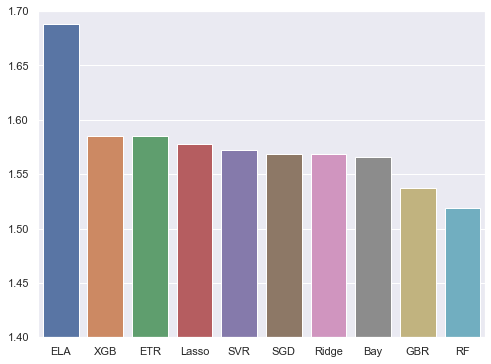

In [191]:
%matplotlib inline
train_model_res = [('Lasso',1.577940), ('Ridge', 1.568418),
                   ('RF', 1.518761), ('SVR', 1.572283),
                   ('GBR',1.537696),('ELA', 1.687836),
                   ('SGD', 1.568569),('Bay', 1.565561), 
                   ('XGB',1.585440), ('ETR',1.585440)] # ETR为Extra Tree Regressor
train_model_res_sorted = sorted(train_model_res, key = lambda elem:elem[1], reverse = True)
trainres_x = [item[0] for item in train_model_res_sorted]
trainres_y = [item[1] for item in train_model_res_sorted]

plt.figure(figsize=(8, 6))
d = sns.barplot(trainres_x, trainres_y)
d.set(ylim = (1.4,1.7))
plt.show()

## 模型集成

选取上述模型中结果较好的5个模型进行集成

In [192]:
# 模型数组
models_ = [model_ridge, model_rf, model_gbr, model_sgd, model_bay]
names_ = ["Ridge", "RF", "GBR", "SGD","BAY"]

### 加权平均集成

In [226]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        # 每个model变成训练后的model
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [242]:
# assign weights based on their gridsearch score
w1 = 0.15
w2 = 0.35
w3 = 0.25
w4 = 0.15
w5 = 0.1

In [243]:
weight_avg = AverageWeight(mod = models,weight=[w1,w2,w3,w4,w5])

In [244]:
rmse_cv(weight_avg,x_train,y_train).mean()

1.530615970460633

In [245]:
# 测试集结果
weight_avg.fit(x_train, y_train)
y_test_pred = weight_avg.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

1.6076878017503733

### Stack模型集成

In [210]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [223]:
stack_model = stacking(mod=models,meta_model=model_rf)

In [224]:
import warnings 
warnings.filterwarnings("ignore")
res = rmse_cv(stack_model,x_train,y_train)
print(res.mean())

1.5339095328422787


In [225]:
# 测试集结果
stack_model.fit(x_train, y_train)
y_test_pred = stack_model.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

1.532547627861211

## 模型总结

本文在数据集上使用了10个模型进行训练和预测，在数据集上产生了良好的实验结果，接着使用2种集成方法集成了上述8个模型中结果较好的5个模型，但上述两种方法并不能对上述模型效果进行提升。综上所述，选取上述模型中实验结果最好的RandomForestRegressor作为官员晋升时长的预测，通过该模型我们还能获得各个特征的重要性。

在平均个人每个阶段晋升需要8年时间的情况下，通过本文的特征提取和模型预测，能在误差大概1.5年左右，通过一个人的基本信息和所处的岗位，预测到下一次晋升需要的时间，发掘出每个官员潜力。

## 实践环节

In [251]:
# df_processed = pd.concat([df_processed, pd.get_dummies(df['race'])], axis = 1).copy()
# df_processed = pd.concat([df_processed, pd.get_dummies(df['born_locate'])], axis = 1).copy()
pd.get_dummies(df['race'])['汉族']

0       0
1       1
3       1
4       1
5       1
       ..
1487    1
1489    1
1490    1
1491    1
1492    1
Name: 汉族, Length: 1180, dtype: uint8

In [279]:
col_prectice = df_processed.columns
col_prectice

Index(['东乡族', '仡佬族', '傣族', '哈萨克族', '回族', '土家族', '壮族', '布依族', '彝族', '拉祜族',
       '朝鲜族', '水族', '汉族', '汉族。', '满族', '瑶族', '白族', '维吾尔族', '苗族', '蒙古族', '藏族',
       '黎族', '云南', '内蒙古', '北京', '吉林', '四川', '天津', '宁夏', '安徽', '山东', '山西', '广东',
       '新疆', '江苏', '江西', '河北', '河南', '浙江', '海南', '湖北', '湖南', '甘肃', '福建', '贵州',
       '辽宁', '重庆', '陕西', '青海', '黑龙江', 'education', 'age', 'if_ccp',
       'work_years', 'ccp_years', 'current_post', 'year_diff'],
      dtype='object')

In [280]:
df_prectice = pd.DataFrame(columns = col_prectice)
prectice_dict = {'东乡族':0, '仡佬族':0, '傣族':0, '哈萨克族':0, '回族':0, '土家族':0, 
                 '壮族':0, '布依族':0, '彝族':0, '拉祜族':0,'朝鲜族':0, '水族':0, '汉族':1, 
                 '汉族。':0, '满族':0, '瑶族':0, '白族':0, '维吾尔族':0, '苗族':0, '蒙古族':0, 
                 '藏族':0, '黎族':0, '云南':0, '内蒙古':0, '北京':0, '吉林':0, '四川':0, '天津':0,
                 '宁夏':0, '安徽':0, '山东':0, '山西':0, '广东':0, '新疆':0, '江苏':0, '江西':0, '河北':0, 
                 '河南':0, '浙江':0, '海南':0, '湖北':0, '湖南':0, '甘肃':0, '福建':1, 
                 '贵州':0, '辽宁':0, '重庆':0, '陕西':0, '青海':0, '黑龙江':0,
                 'education':1, 'age':28, 'if_ccp':1, 'work_years':2, 
                 'ccp_years':8, 'current_post':1}
new_predict = pd.DataFrame(prectice_dict, index = [1])
df_prectice = df_prectice.append(new_predict, ignore_index=True)
df_prectice=df_prectice.fillna(0)
df_prectice

,age,ccp_years,current_post,education,if_ccp,work_years,year_diff,东乡族,云南,仡佬族,...,苗族,蒙古族,藏族,贵州,辽宁,重庆,陕西,青海,黎族,黑龙江
0,28,8,1,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [292]:
df_prectice = df_prectice[col_prectice]
df_prectice

,东乡族,仡佬族,傣族,哈萨克族,回族,土家族,壮族,布依族,彝族,拉祜族,...,陕西,青海,黑龙江,education,age,if_ccp,work_years,ccp_years,current_post,year_diff
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,28,1,2,8,1,0


In [294]:
df_prectice.iloc[:,:-1]

,东乡族,仡佬族,傣族,哈萨克族,回族,土家族,壮族,布依族,彝族,拉祜族,...,重庆,陕西,青海,黑龙江,education,age,if_ccp,work_years,ccp_years,current_post
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,28,1,2,8,1


In [303]:
x_prectice = df_prectice.iloc[:,:].values

y_prectice_predict = model_extra.predict(x_precitce)
print('模型预测大约%d天能成功升职'%(y_prectice_predict*365),',根据模型误差，最晚%d天能够升职'%((y_prectice_predict+1.5)*365))

模型预测大约309天能成功升职 ,根据模型误差，最晚857天能够升职
